# 서울시 공원 지도에 표시하기

In [1]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import requests
from urllib.parse import quote
import pandas as pd
import folium

## 데이터 파악하고 정리하기

In [4]:
park = pd.read_csv('서울시 주요 공원현황(수정).csv')
park

,공원번호,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 2454140㎡ 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107000,4.503956e+05,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,3,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120000,4.488527e+05,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,4,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690㎡,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267000,4.371640e+05,127.019846,37.426449,http://grandpark.seoul.go.kr/
3,5,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432000,4.492907e+05,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,6,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070000,4.515988e+05,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1378,용마도시자연공원(사가정공원),2005년 4월 13일 개장한 사가정공원은 면목동 산 50번지 일대의 면목약수터지구...,109635㎡,2005.4.13,피크닉장 놀이터 체력단련장 체육관,NaN,NaN,NaN,NaN,http://parks.seoul.go.kr/file/info/view.do?fId...,중랑구,서울 중랑구 면목동 산 50-15,중랑구청 공원녹지과,02-2094-2993,NaN,NaN,127.095997,37.579762,NaN
128,1379,문화비축기지,매봉산자락에 위치한 문화비축기지는 폐산업시설인 '마포석유비축기지'를 재생하여 역사적...,140022㎡,2017.9.1,6개의탱크와 문화마당 녹지,NaN,http://parks.seoul.go.kr/upload/seditorMulti/2...,NaN,? 일반사항 - 공원은 연중무휴이나 전시관은 월요일 휴관입니다. - 공원을 ...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 증산로 87,문화비축기지,02-376-8410,114264.460400,3.712093e+06,126.893246,37.571718,http://parks.seoul.go.kr/template/sub/culturet...
129,1380,경춘선숲길,일제 강점기때 우리 민족의 자본으로 만든 최초의 철도시설로 1939년 7월 25일 ...,211392㎡,NaN,조경시설 : 텃밭 잔디광장 철길 산책로 등 건축시설 : 무궁화호 객차(방문자센터) ...,NaN,NaN,지하철 이용시 지하철 7호선 하계역 4번출구 미성/장미아파트 도로 450m직진 지하...,○ 6.3km (시 작 점 : 육사삼거리 중간지점 : 화랑대사거리 → 화랑대...,http://parks.seoul.go.kr/file/info/view.do?fId...,노원구,서울 노원구 공릉동 706,중부공원녹지사업소,02-2289-4012,127.076482,3.762708e+01,127.076482,37.627077,NaN
130,1381,율현공원,? 율현공원은 보금자리주택 세곡2지구 사업의 결과물로 만들어졌다. 공원은 주택지구의...,157535㎡,2016.11.1,관리시설 : 사무실 조경시설 : 정자(4개) 조형쉼터(10개) 조형파고라(3개) 수...,수목 : 소나무 이팝나무 등 110종 143069주 초화 : 맥문동 벌개미취 등...,http://parks.seoul.go.kr/upload/seditorMulti/2...,NaN,공원 인근에 서울공항 활주로가 위치하고 있어 공원 내에서 드론을 날리거나 헬륨가스 ...,http://parks.seoul.go.kr/file/info/view.do?fId...,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,02-459-9452,NaN,NaN,127.11559

In [5]:
park.isnull().sum()

공원번호              0
공원명               0
공원개요              1
면적                3
개원일              10
주요시설              8
주요식물             44
안내도              30
오시는길             17
이용시참고사항          12
이미지               0
지역                0
공원주소              0
관리부서              0
전화번호              0
X좌표(GRS80TM)     10
Y좌표(GRS80TM)     10
X좌표(WGS84)        1
Y좌표(WGS84)        1
바로가기            114
dtype: int64

In [6]:
park['면적'] = park.면적.fillna('0')
park.면적.isnull().sum()

0

In [7]:
def calc_area(s):
    if s == '0':
        return 0

    num_list = s.strip().split('㎡')
    area = 0
    for num_str in num_list:
        if num_str == '':
            continue
        area += float(num_str)

    return area

In [8]:
park['area'] = park.면적.map(calc_area).astype(int)
park[['면적','area']].head()

,면적,area
0,2896887㎡ 2454140㎡ 442747㎡,5793774
1,80683㎡,80683
2,9132690㎡,9132690
3,480994㎡,480994
4,2284085㎡,2284085


In [9]:
park_new = park[['공원명','지역','공원주소','area','공원개요']]
park_new.head()

,공원명,지역,공원주소,area,공원개요
0,남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),5793774,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...
1,길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),80683,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...
2,서울대공원,과천시,경기도 과천시 대공원광장로 102,9132690,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...
3,서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),480994,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...
4,월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),2284085,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...


## 위도 경도 구하기

In [10]:
import requests
from urllib.parse import quote

In [11]:
with open('kakaoapikey.txt', mode='r') as key_file:
    kakao_key = key_file.read()
local_url = 'https://dapi.kakao.com/v2/local/search/address.json'

In [12]:
lat_list, lng_list = [], []
for i in park_new.index:
    try:
        url = f"{local_url}?query={quote(park_new['공원주소'][i])}"
        result = requests.get(url,
                headers={"Authorization": "KakaoAK "+kakao_key}).json()
        lat = float(result['documents'][0]['y'])
        lng = float(result['documents'][0]['x'])
        lat_list.append(lat)
        lng_list.append(lng)
    except:
        print(park_new.공원명[i], park_new.공원주소[i])

낙산근린공원 서울특별시 종로구 낙산길 41 (우) 03085
자매근린공원 서울특별시 영등포구 의사당대로 166 (우) 07324
와룡근린공원 서울특별시 종로구 와룡공원길 192 (우) 03063
삼청근린공원 서울특별시 종로구 북촌로 134-1 (우) 03050
세종로공원 서울특별시 종로구 세종대로 189 (우) 03172


In [13]:
lat_list, lng_list = [], []
for i in park_new.index:
    try:
        addr = park_new.공원주소[i].split('(우)')[0]
        url = f"{local_url}?query={quote(addr)}"
        result = requests.get(url,
                headers={"Authorization": "KakaoAK "+kakao_key}).json()
        lat = float(result['documents'][0]['y'])
        lng = float(result['documents'][0]['x'])
        lat_list.append(lat)
        lng_list.append(lng)
    except:
        print(park_new.공원명[i], park_new.공원주소[i])

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
park_new['lat'], park_new['lng'] = lat_list, lng_list
park_new.head()

,공원명,지역,공원주소,area,공원개요,lat,lng
0,남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),5793774,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,37.555633,126.992218
1,길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),80683,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,37.539066,127.153329
2,서울대공원,과천시,경기도 과천시 대공원광장로 102,9132690,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,37.436431,127.014098
3,서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),480994,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,37.543070,127.041799
4,월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),2284085,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,37.572327,126.881889


## 면적을 3등분 하기

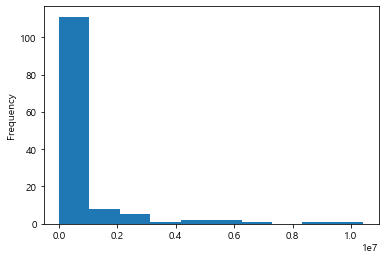

In [16]:
park_new.area.plot(kind='hist')
plt.show()

In [17]:
area_criteria = [-1, 100000, 1000000, 12000000]
labels = ['소형', '중형', '대형']
size_info = [3, 7, 15]

In [18]:
park_new['scale'] = pd.cut(park_new.area, area_criteria, labels=labels)
park_new['size'] = pd.cut(park_new.area, area_criteria, labels=size_info)
park_new.head()

,공원명,지역,공원주소,area,공원개요,lat,lng,scale,size
0,남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),5793774,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,37.555633,126.992218,대형,15
1,길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),80683,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,37.539066,127.153329,소형,3
2,서울대공원,과천시,경기도 과천시 대공원광장로 102,9132690,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,37.436431,127.014098,대형,15
3,서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),480994,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,37.543070,127.041799,중형,7
4,월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),2284085,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,37.572327,126.881889,대형,15


## 지도에 공원 표시하기

In [19]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
for i in park_new.index:
    folium.CircleMarker(
        location=[park_new.lat[i], park_new.lng[i]], 
        radius=int(park_new['size'][i]),
        tooltip=f"{park_new.공원명[i]}({park_new.area[i]:,d}㎡)",
        color='#3186cc', fill_color='#3186cc'
    ).add_to(map)

title_html = '<h3 align="center" style="font-size:20px"><b>서울시내 공원 위치와 크기</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

## 자치구별 공원 분석

In [20]:
park_gu = park_new.groupby('지역').sum()
park_gu['공원수'] = park_new.groupby('지역').count()['area']
del park_gu['lat']
del park_gu['lng']
park_gu.drop(['과천시'], inplace=True)
park_gu.rename(columns={'area': '공원면적'}, inplace=True)
park_gu.head()

,공원면적,공원수
지역,,
강남구,3626398,7
강동구,1526387,7
강북구,3714902,4
강서구,2194152,9
관악구,10431453,2


- 구별 공원 면적

In [21]:
import json
geo_str = json.load(open('skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [22]:
map = folium.Map(
        location=[37.5502, 126.982], 
        zoom_start=11, tiles='Stamen Toner'
)
map.choropleth(
    geo_data = geo_str,
    data = park_gu.공원면적,
    columns = [park_gu.index, park_gu.공원면적],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)
for i in park_new.index:
    folium.CircleMarker(
        location=[park_new.lat[i], park_new.lng[i]], 
        radius=int(park_new['size'][i]),
        tooltip=f"{park_new.공원명[i]}({park_new.area[i]:,d}㎡)",
        color='red', fill_color='red'
    ).add_to(map)

title_html = '<h3 align="center" style="font-size:20px"><b>자치구별 공원면적</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map